In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [86]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies (3).csv


In [87]:
raw_data = pd.read_csv('my_movies.csv')
raw_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


#Descriptive Statistics

In [88]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [89]:
raw_data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
raw_data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [91]:
raw_data[raw_data.duplicated()].sum()

V1                     GladiatorGladiatorGladiator
V2                           PatriotPatriotPatriot
V3               Sixth SenseSixth SenseSixth Sense
V4                                               0
V5                                               0
Sixth Sense                                      3
Gladiator                                        3
LOTR1                                            0
Harry Potter1                                    0
Patriot                                          3
LOTR2                                            0
Harry Potter2                                    0
LOTR                                             0
Braveheart                                       0
Green Mile                                       0
dtype: object

#Data Visualization

In [92]:
data = raw_data.iloc[:,5:]
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [93]:
data.shape

(10, 10)

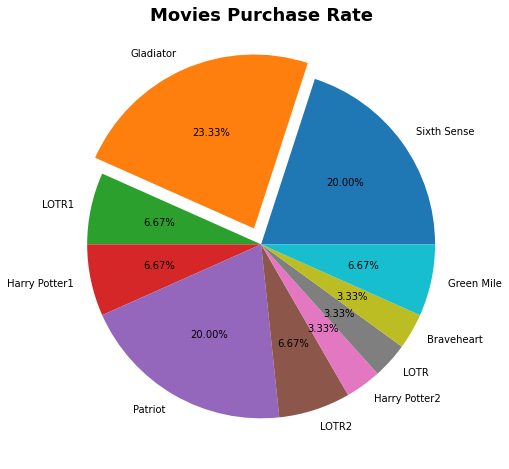

In [94]:
plt.figure(figsize = (12,8))
plt.pie(data.sum(),
       labels=data.columns,
       explode = [0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%')
plt.title("Movies Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [95]:
# Top Most Frequent Bought Books
count = data.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [96]:
# Top Most Frequent Bought Movies
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'Items',0:'Count'})
count

,Items,Count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


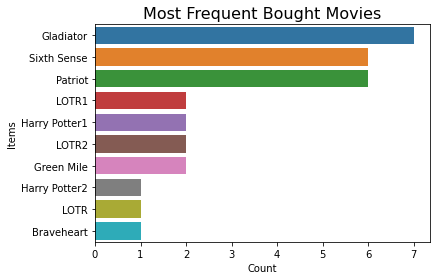

In [97]:
sns.barplot(x = 'Count', y = 'Items', data= count)
plt.title('Most Frequent Bought Movies',fontsize=16)
plt.show()

#Association Rules

**Apriori Algorithm with 10% Support and 30% confidence**

In [98]:
df = data.copy()
items = apriori(df,min_support=0.1,use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x: len(x))
items

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [99]:
rules = association_rules(items,metric='confidence',min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
212,"(LOTR1, Harry Potter1)","(Sixth Sense, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


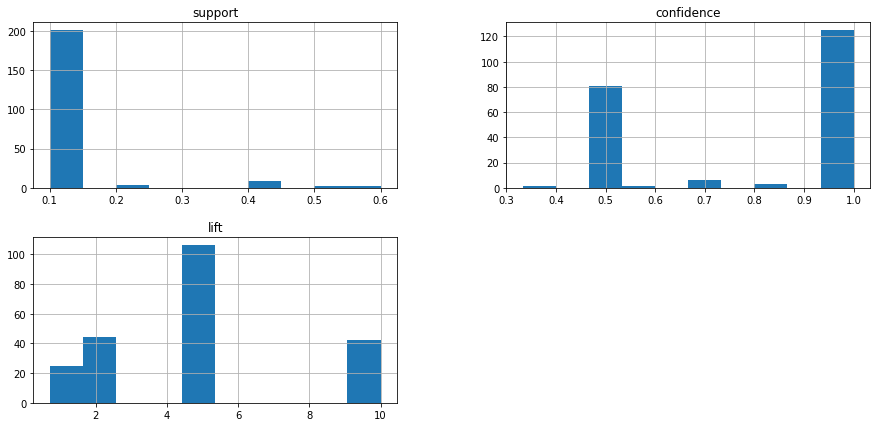

In [100]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [101]:
# Lift Ratio > 1 is a good influential rule
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
212,"(LOTR1, Harry Potter1)","(Sixth Sense, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


#Visualization

Support vs Confidence

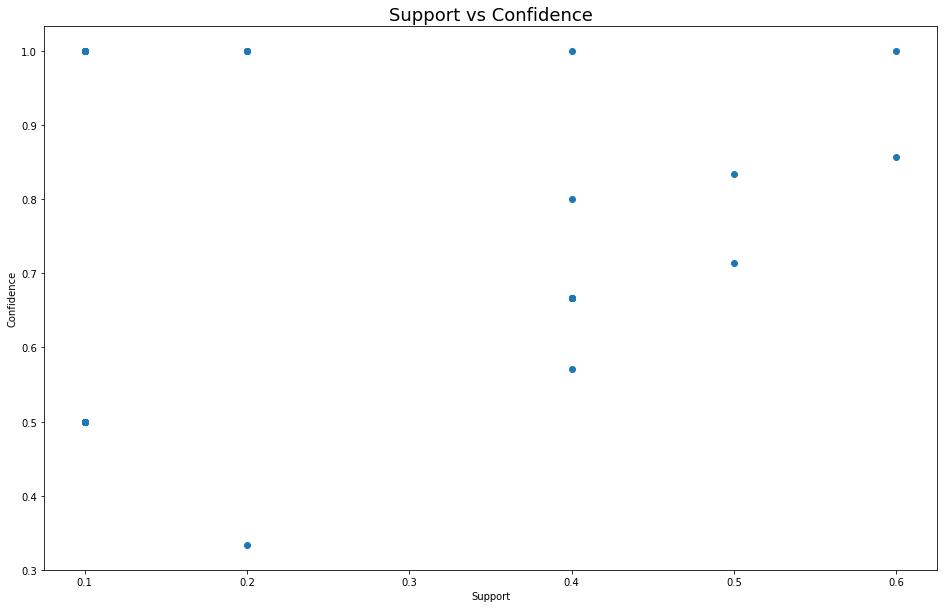

In [102]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.title('Support vs Confidence', fontsize=18)
plt.show()

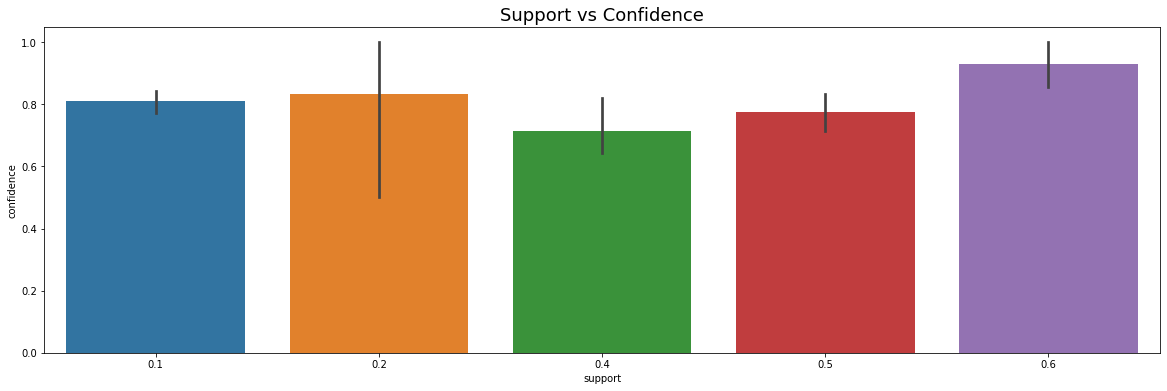

In [103]:
plt.figure(figsize=(20,6))
sns.barplot("support","confidence",data=lift)
plt.title("Support vs Confidence", fontsize=18)
plt.show()

Lift vs Confidence

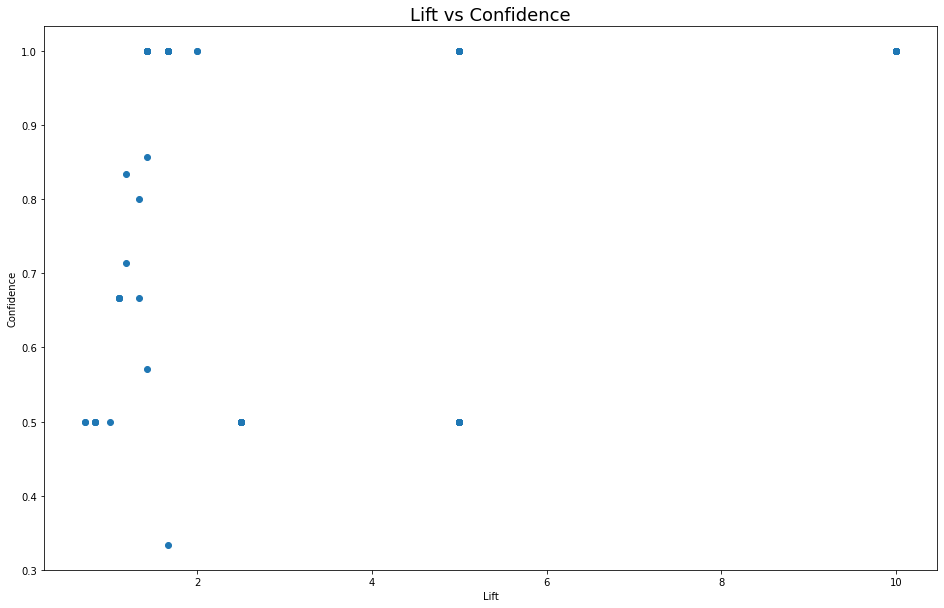

In [104]:
plt.figure(figsize=(16,10))
plt.scatter(rules['lift'],rules['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence') 
plt.title('Lift vs Confidence', fontsize=18)
plt.show()

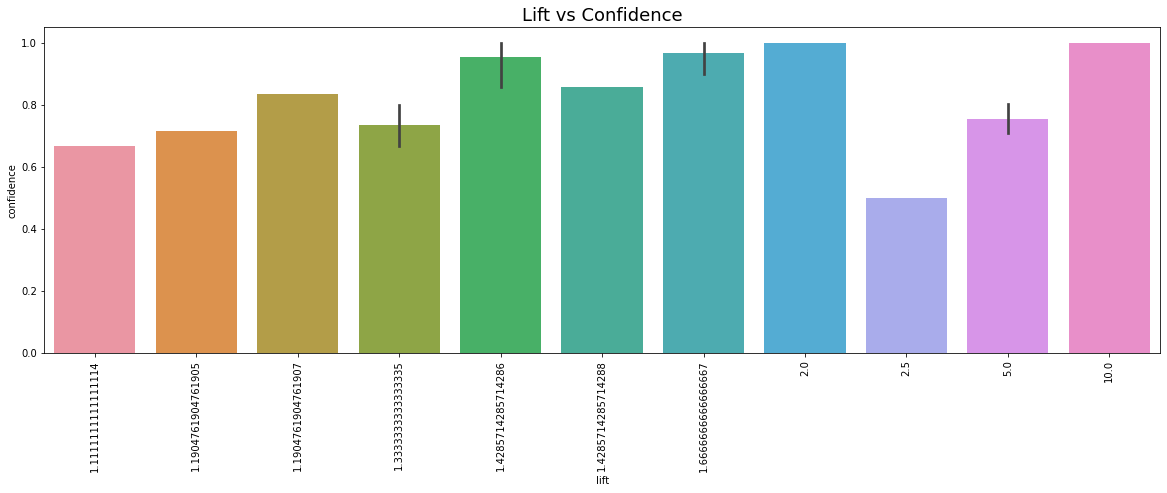

In [105]:
plt.figure(figsize=(20,6))
sns.barplot("lift","confidence",data=lift)
plt.title("Lift vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

Support vs Lift

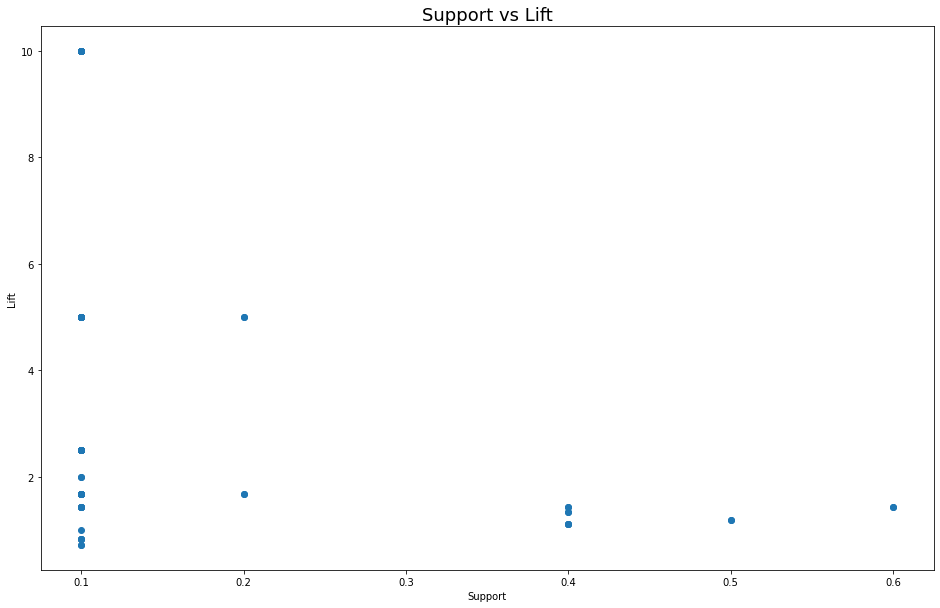

In [106]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift') 
plt.title('Support vs Lift', fontsize=18)
plt.show()

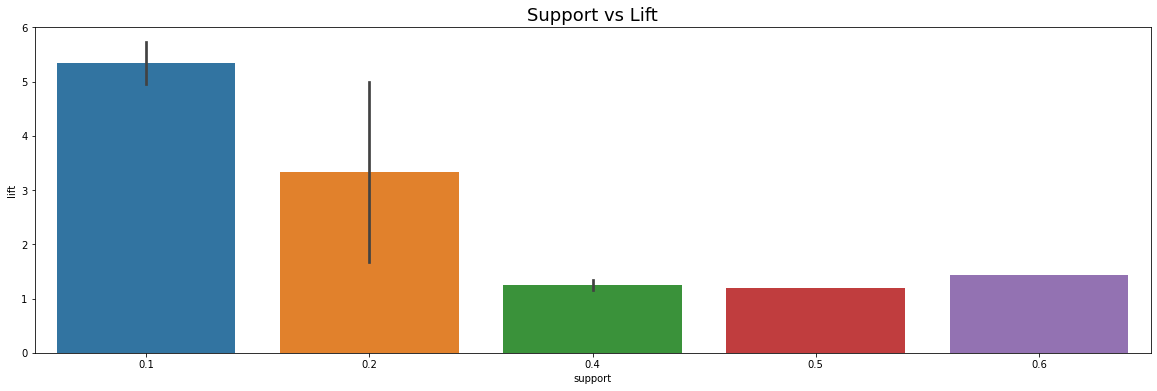

In [107]:
plt.figure(figsize=(20,6))
sns.barplot("support","lift",data=lift)
plt.title("Support vs Lift", fontsize=18)
plt.show()

**Apriori Algorithm with 15% Support and 40% confidence**

In [108]:
df = data.copy()
items = apriori(df,min_support=0.15,use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x: len(x))
items

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [109]:
rules = association_rules(items,metric='confidence',min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


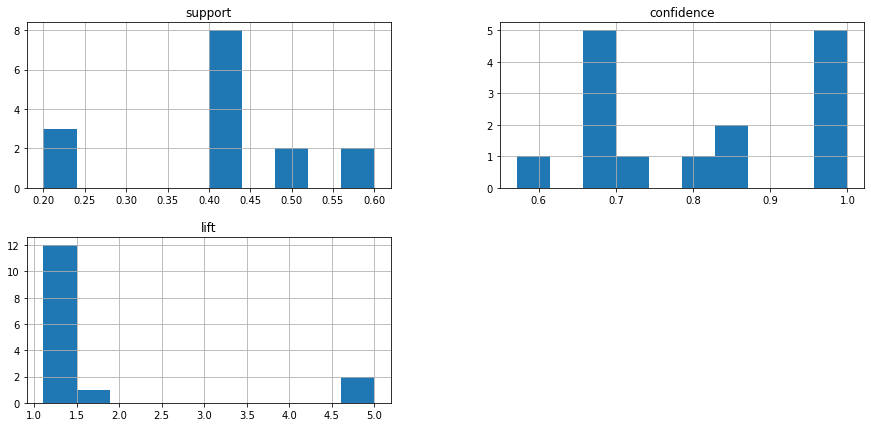

In [110]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [111]:
# Lift Ratio > 1 is a good influential rule
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


Support vs Confidence

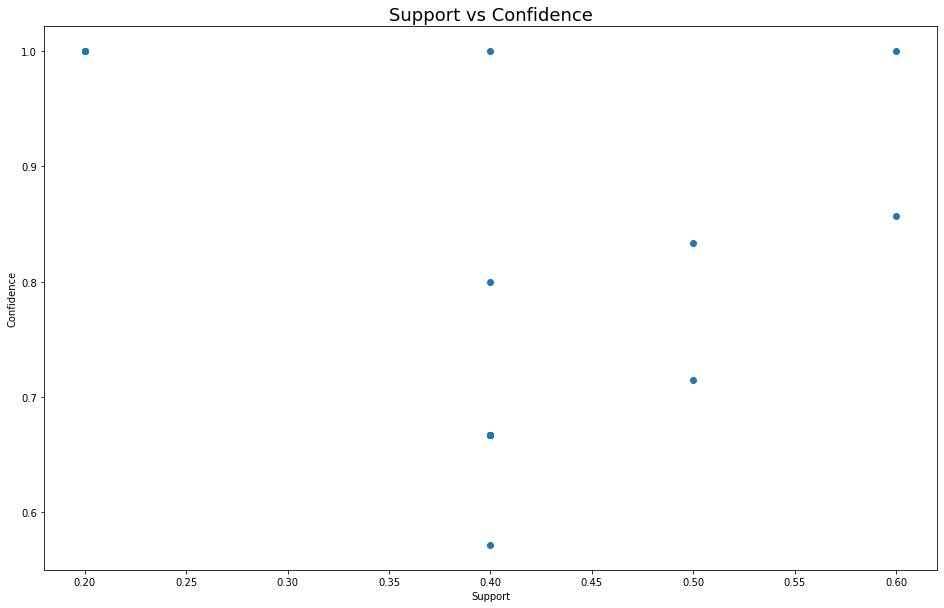

In [112]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.title('Support vs Confidence', fontsize=18)
plt.show()

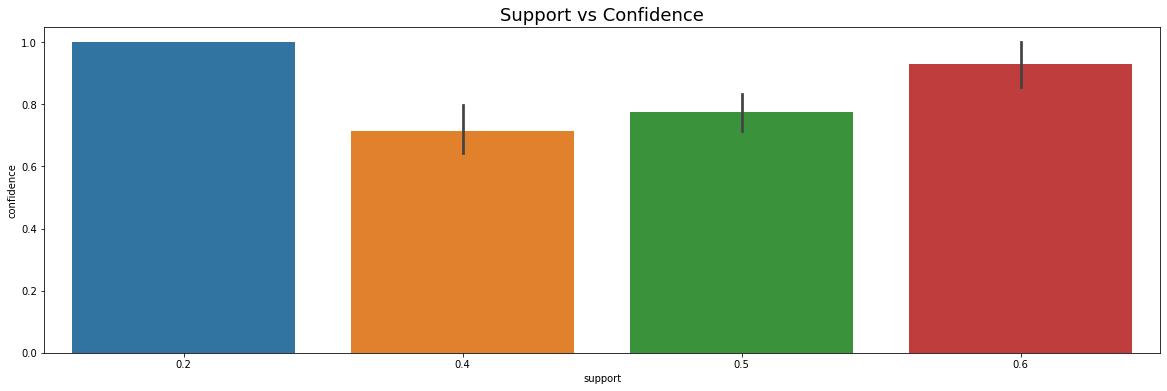

In [113]:
plt.figure(figsize=(20,6))
sns.barplot("support","confidence",data=lift)
plt.title("Support vs Confidence", fontsize=18)
plt.show()

Lift vs Confidence

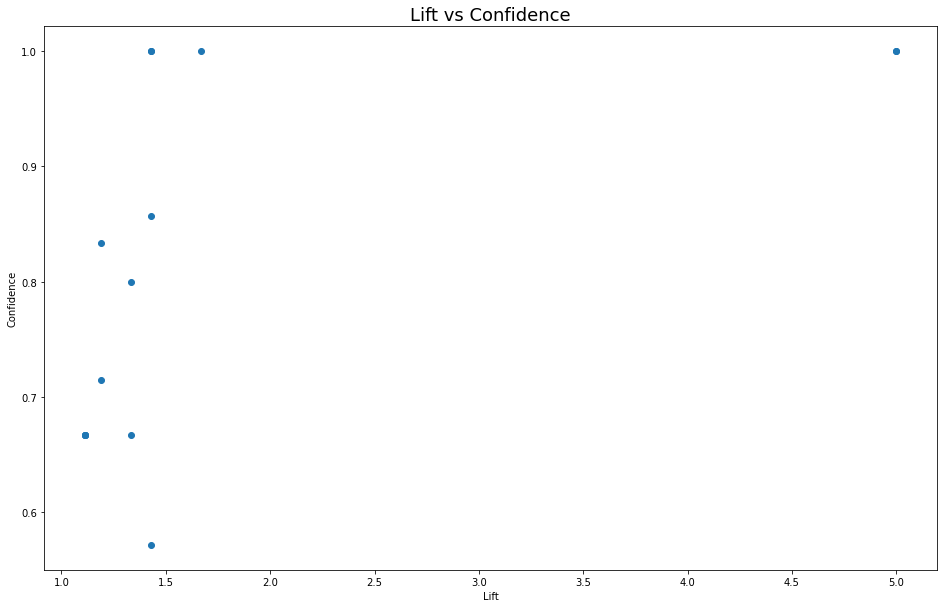

In [114]:
plt.figure(figsize=(16,10))
plt.scatter(rules['lift'],rules['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence') 
plt.title('Lift vs Confidence', fontsize=18)
plt.show()

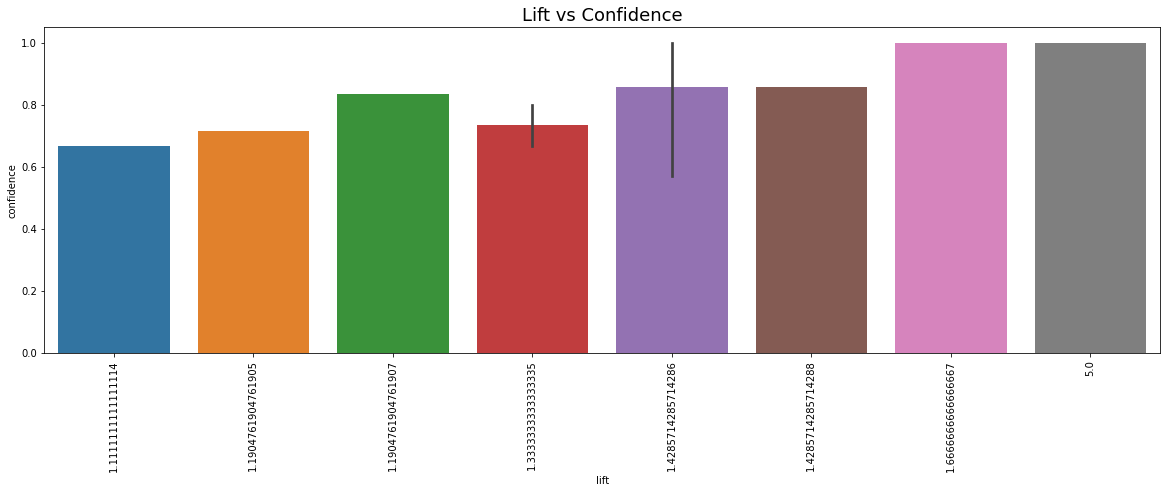

In [115]:
plt.figure(figsize=(20,6))
sns.barplot("lift","confidence",data=lift)
plt.title("Lift vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

Support vs Lift

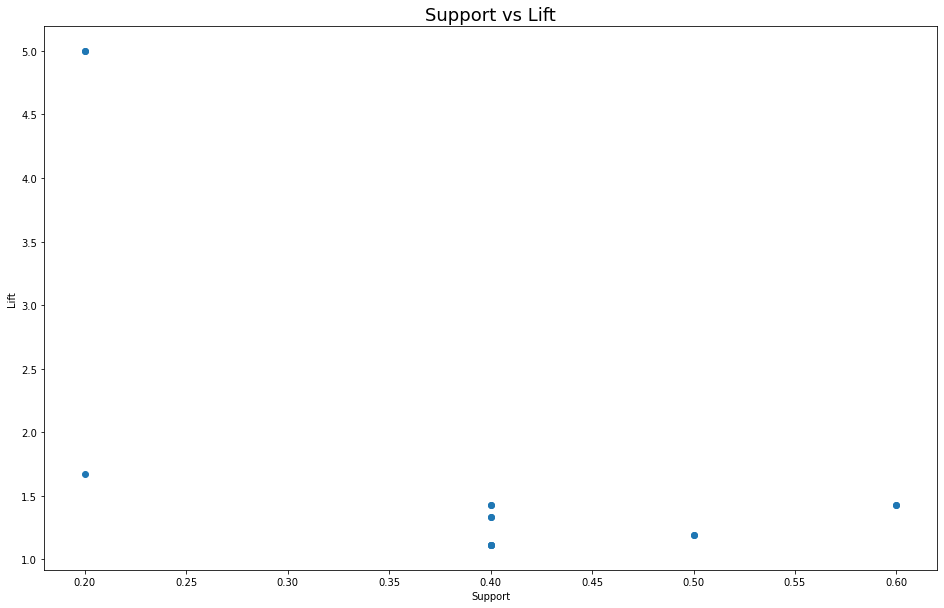

In [116]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift') 
plt.title('Support vs Lift', fontsize=18)
plt.show()

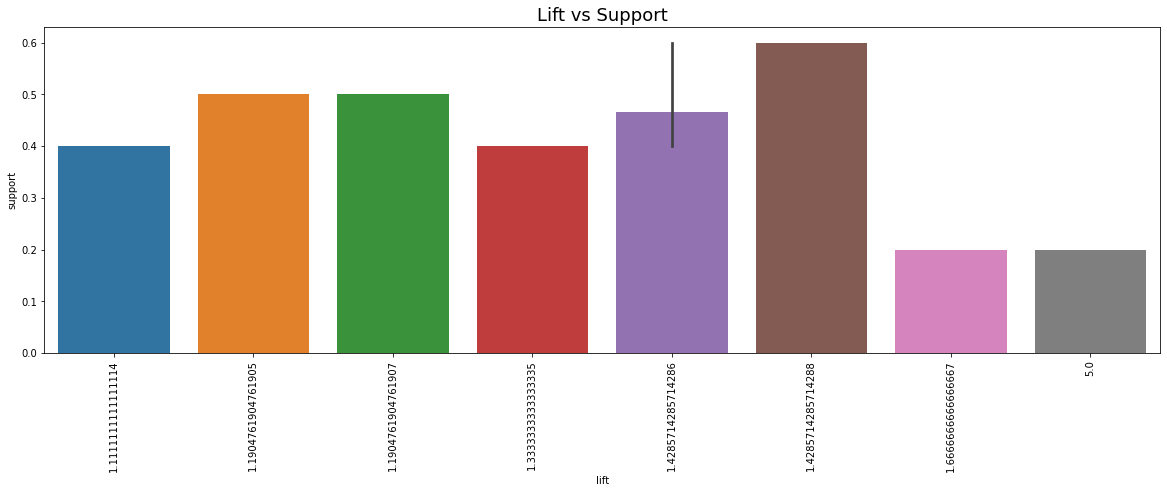

In [117]:
plt.figure(figsize=(20,6))
sns.barplot("lift","support",data=lift)
plt.title("Lift vs Support", fontsize=18)
plt.xticks(rotation=90)
plt.show()

**Apriori Algorithm for 20% Support and 60% confidence**

In [118]:
df = data.copy()
items = apriori(data,min_support=0.2,use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x: len(x))
items

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [119]:
rules = association_rules(items,metric='confidence',min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


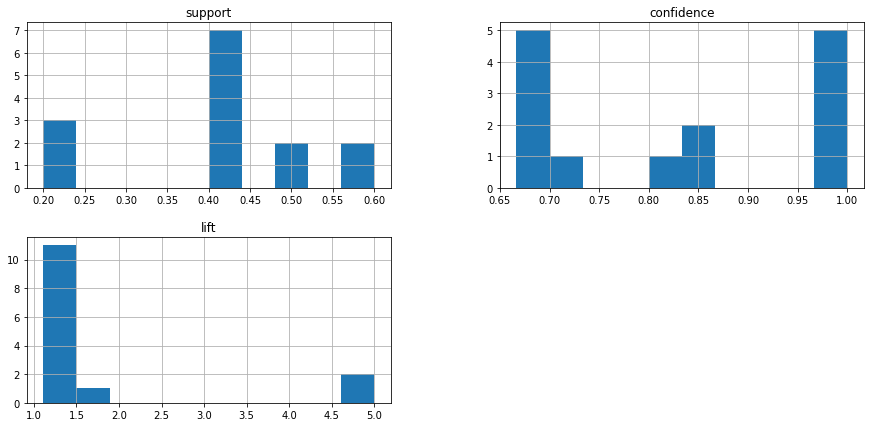

In [120]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [121]:
# Lift Ratio > 1 is a good influential rule
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


Support vs Confidence

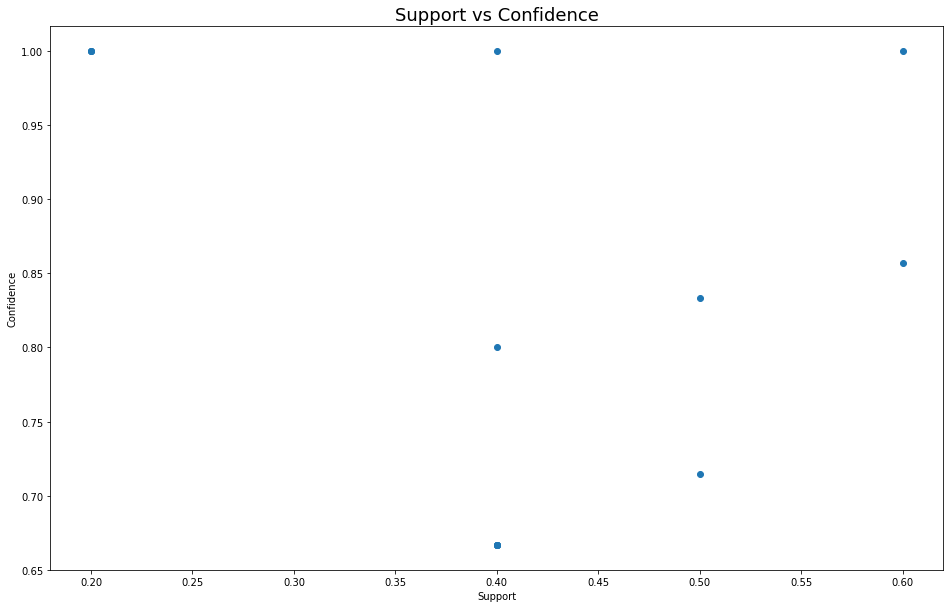

In [122]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.title('Support vs Confidence', fontsize=18)
plt.show()

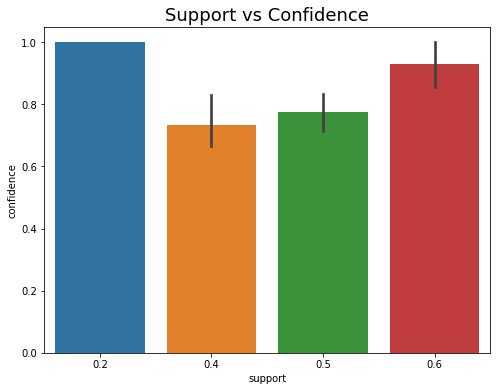

In [123]:
plt.figure(figsize=(8,6))
sns.barplot("support","confidence",data=lift)
plt.title("Support vs Confidence", fontsize=18)
plt.show()

Lift vs Confidence

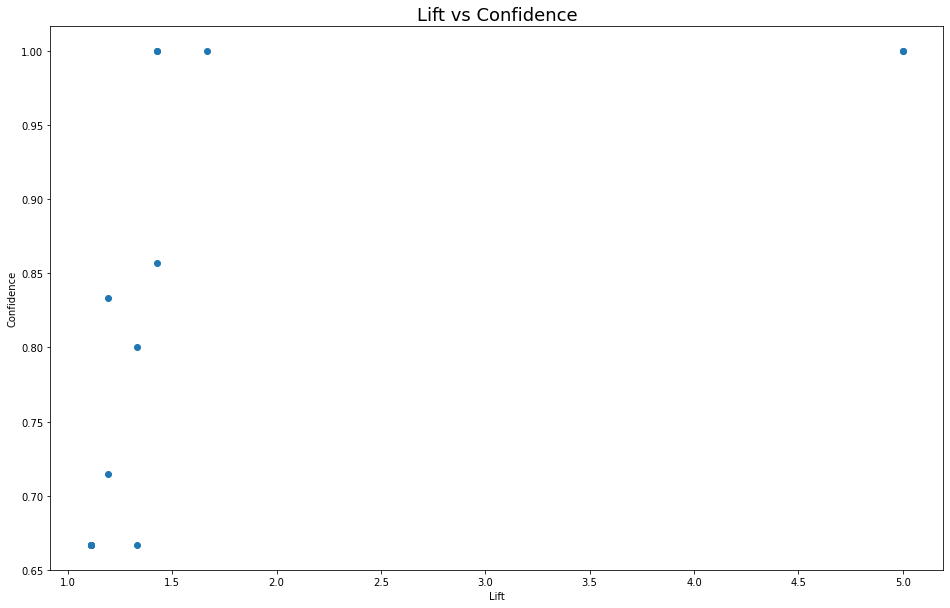

In [124]:
plt.figure(figsize=(16,10))
plt.scatter(rules['lift'],rules['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence') 
plt.title('Lift vs Confidence', fontsize=18)
plt.show()

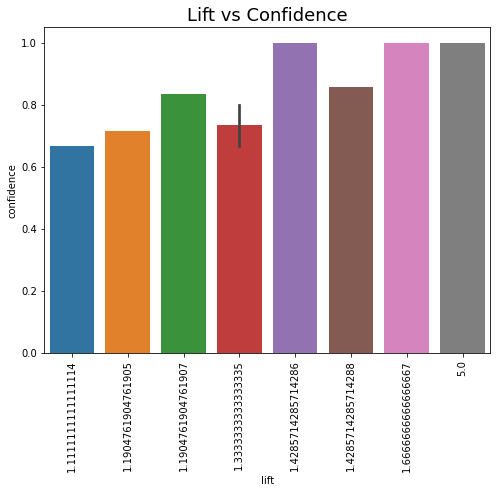

In [126]:
plt.figure(figsize=(8,6))
sns.barplot("lift","confidence",data=lift)
plt.title("Lift vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

Support vs Lift

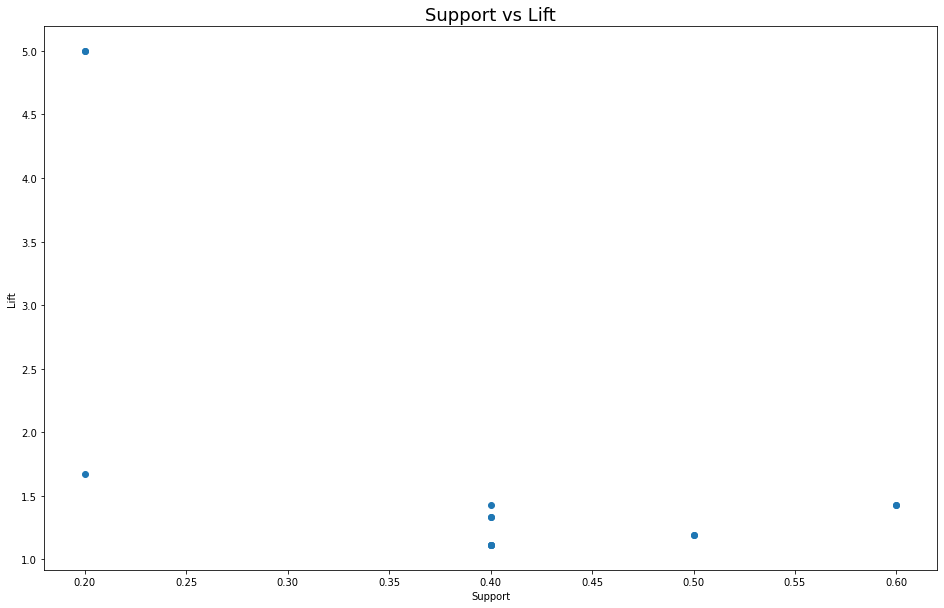

In [127]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift') 
plt.title('Support vs Lift', fontsize=18)
plt.show()

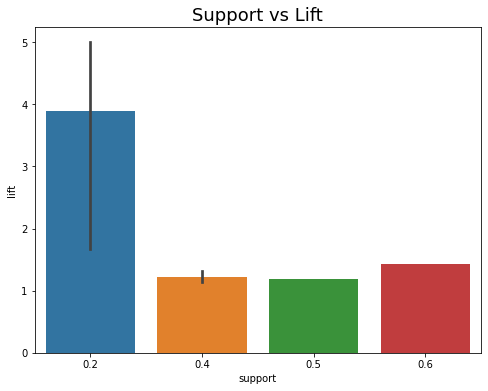

In [128]:
plt.figure(figsize=(8,6))
sns.barplot("support","lift",data=lift)
plt.title("Support vs Lift", fontsize=18)
plt.show()